# 01C. Numerical methods

### Mingyang Lu

### 12/17/2023

##  Babylonian method

In [1]:
# The Babylonian method for finding square root
# a: a positive real number; we will solve the square root of a.
# x1: the initial guess of the solution. x1 should be positive too.
# epsilon: a small positive number for the tolerance.

def babylonian(a, x1, epsilon=1e-6):
    if a <= 0 or x1 <= 0:
        print("a and x1 should be both positive!")
        return 0
    else:
        x = x1
        i = 0
        while abs(x * x - a) > epsilon:
            i += 1
            x = (x + a / x) / 2
        print(f"Number of iterations: {i}")
        return x

babylonian(2, 1)
babylonian(2, 100)
babylonian(2, 200)

Number of iterations: 4
Number of iterations: 10
Number of iterations: 11


1.4142135623738412

## Cubic spline interpolation

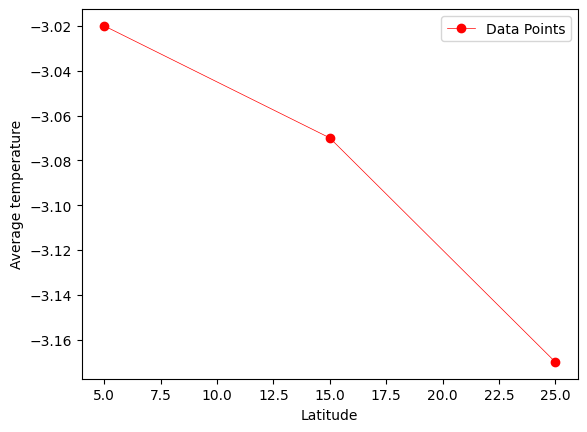

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
x = np.array([5, 15, 25])
y = np.array([-3.02, -3.07, -3.17])

# Plotting
plt.plot(x, y, 'ro-', label='Data Points', linewidth=0.5)
plt.xlabel("Latitude")
plt.ylabel("Average temperature")
plt.legend()
plt.show()

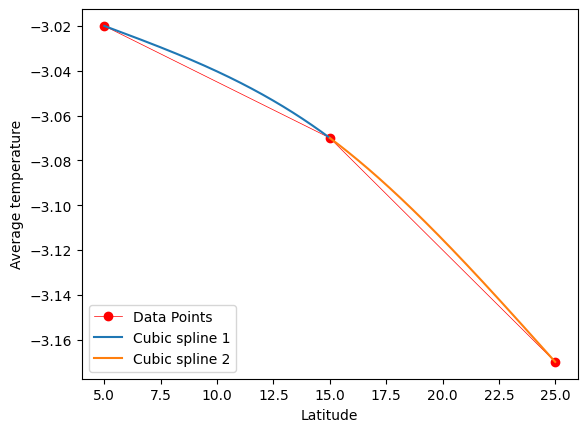

In [3]:
# Create the vector vec_c
vec_c = np.array([y[0], y[1], y[1], y[2], 0, 0, 0, 0])

# Create the matrix a
a = np.array([[x[0]**3, x[0]**2, x[0], 1, 0, 0, 0, 0],
              [x[1]**3, x[1]**2, x[1], 1, 0, 0, 0, 0],
              [0, 0, 0, 0, x[1]**3, x[1]**2, x[1], 1],
              [0, 0, 0, 0, x[2]**3, x[2]**2, x[2], 1],
              [3*x[1]**2, 2*x[1], 1, 0, -3*x[1]**2, -2*x[1], -1, 0],
              [6*x[1], 2, 0, 0, -6*x[1], -2, 0, 0],
              [6*x[0], 2, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 6*x[2], 2, 0, 0]])

# Solve for vec_p
vec_p = np.linalg.solve(a, vec_c)

# Plotting
plt.plot(x, y, 'ro-', label='Data Points', linewidth=0.5)
x_vals_1 = np.linspace(x[0], x[1], 1000)
x_vals_2 = np.linspace(x[1], x[2], 1000)
plt.plot(x_vals_1, vec_p[0] * x_vals_1**3 + vec_p[1] * x_vals_1**2 + vec_p[2] * x_vals_1 + vec_p[3], label='Cubic spline 1', linewidth=1.5)
plt.plot(x_vals_2, vec_p[4] * x_vals_2**3 + vec_p[5] * x_vals_2**2 + vec_p[6] * x_vals_2 + vec_p[7], label='Cubic spline 2', linewidth=1.5)

plt.xlabel("Latitude")
plt.ylabel("Average temperature")
plt.legend(loc="lower left")
plt.show()